In [ ]:
# ================== IMPORT LIBRARIES ==================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập giao diện chung cho biểu đồ
sns.set_theme(style="whitegrid")

# ================== LOAD DATA ==================
try:
    df = pd.read_csv('../data_booking.com/full_data_merged.csv')
    print("-> Đã load dữ liệu thành công!")
except FileNotFoundError:
    print("-> Không tìm thấy file, vui lòng kiểm tra đường dẫn.")

# ================== DATA PREPARATION ==================
# Chuyển đổi giá sang đơn vị Triệu VNĐ để dễ đọc trên biểu đồ
if 'Final Price' in df.columns:
    df['Final Price (Million)'] = df['Final Price'] / 1_000_000
    df['Original Price (Million)'] = df['Original Price'] / 1_000_000

# Kiểm tra nhanh dữ liệu
df.head()

-> Đã load dữ liệu thành công!


,Scenario,Search Location,Hotel Name,Hotel Link,Stars_Clean,District,Address,Room_Class,Room Type,Bed_Class,...,Breakfast_Bool,Badge_Clean,Adults,Children,Total_Guests,Check-in,Area_m2_cleaned,Facilities_cleaned,Final Price (Million),Original Price (Million)
0,Random_1A_0C_1R,Ho Chi Minh,*BOM HOMES* VINHOMES CENTRAL PARK- LUXURY APAR...,https://www.booking.com/hotel/vn/bom-homes-vin...,0.0,Quận Bình Thạnh,"Quận Bình Thạnh, TP. Hồ Chí Minh (Hàng Xanh)",Apartment,Căn Hộ 1 Phòng Ngủ,Double & Large & Sofa,...,0,No Deal,1,0,1,2026-01-01,60.0,"căn hộ 1 phòng ngủ, căn hộ nguyên căn, 60 m², ...",9.720,9.720
1,Random_3A_2C_3R_Ages(10_16),Ho Chi Minh,*BOM HOMES* VINHOMES CENTRAL PARK- LUXURY APAR...,https://www.booking.com/hotel/vn/bom-homes-vin...,0.0,Quận Bình Thạnh,"Quận Bình Thạnh, TP. Hồ Chí Minh (Hàng Xanh)",Apartment,Căn Hộ 2 Phòng Ngủ,Double & Large & Sofa,...,0,No Deal,3,2,5,2026-01-01,85.0,"căn hộ 2 phòng ngủ, căn hộ nguyên căn, 85 m², ...",10.260,10.260
2,Random_5A_2C_3R_Ages(17_9),Ho Chi Minh,*BOM HOMES* VINHOMES CENTRAL PARK- LUXURY APAR...,https://www.booking.com/hotel/vn/bom-homes-vin...,0.0,Quận Bình Thạnh,"Quận Bình Thạnh, TP. Hồ Chí Minh (Hàng Xanh)",Apartment,Căn Hộ 1 Phòng Ngủ,Double & Large & Sofa,...,0,No Deal,5,2,7,2026-01-01,60.0,"căn hộ 1 phòng ngủ, căn hộ nguyên căn, 60 m², ...",19.980,19.980
3,Random_1A_0C_1R,Ho Chi Minh,1 AM Home Sai Gon,https://www.booking.com/hotel/vn/1-am-homestay...,0.0,Quận 3,"Quận 3, TP. Hồ Chí Minh",Standard,Phòng Có Giường Cỡ Queen,Queen,...,0,No Deal,1,0,1,2026-01-01,13.0,"phòng có giường cỡ queen, wifi miễn phí, điều ...",1.539,1.539
4,Random_2A_0C_1R,Ho Chi Minh,1 AM Home Sai Gon,https://www.booking.com/hotel/vn/1-am-homestay...,0.0,Quận 3,"Quận 3, TP. Hồ Chí Minh",Standard,Phòng Có Giường Cỡ Queen,Queen,...,0,No Deal,2,0,2,2026-01-01,13.0,"phòng có giường cỡ queen, wifi miễn phí, điều ...",1.620,1.620


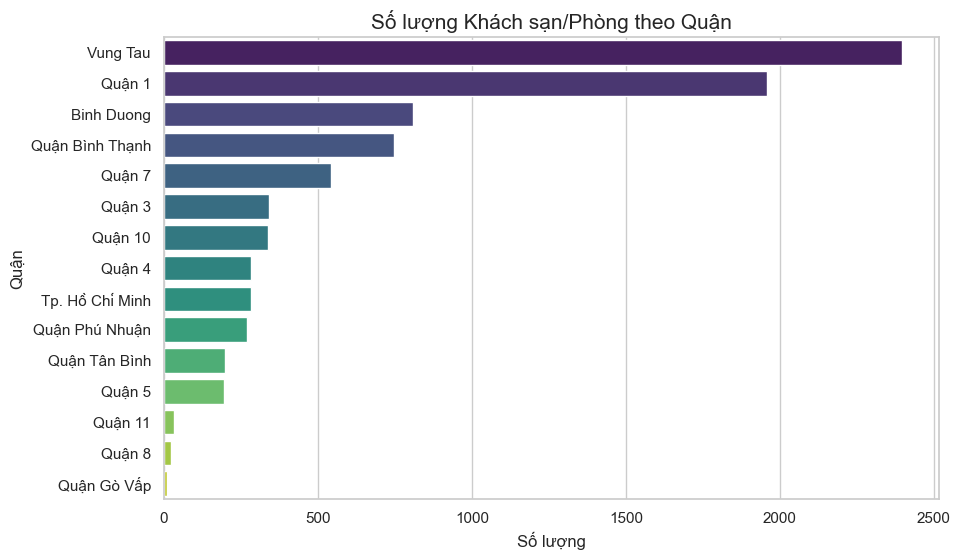

In [6]:
# --- BIỂU ĐỒ 1: PHÂN BỐ SỐ LƯỢNG THEO QUẬN ---
plt.figure(figsize=(10, 6))

# Đếm số lượng dòng dữ liệu theo từng quận
district_counts = df['District'].value_counts()

sns.barplot(
    x=district_counts.values,
    y=district_counts.index,
    hue=district_counts.index, # Tô màu theo quận để dễ nhìn
    legend=False,
    palette="viridis"
)

plt.title('Số lượng Khách sạn/Phòng theo Quận', fontsize=15)
plt.xlabel('Số lượng', fontsize=12)
plt.ylabel('Quận', fontsize=12)
plt.show()

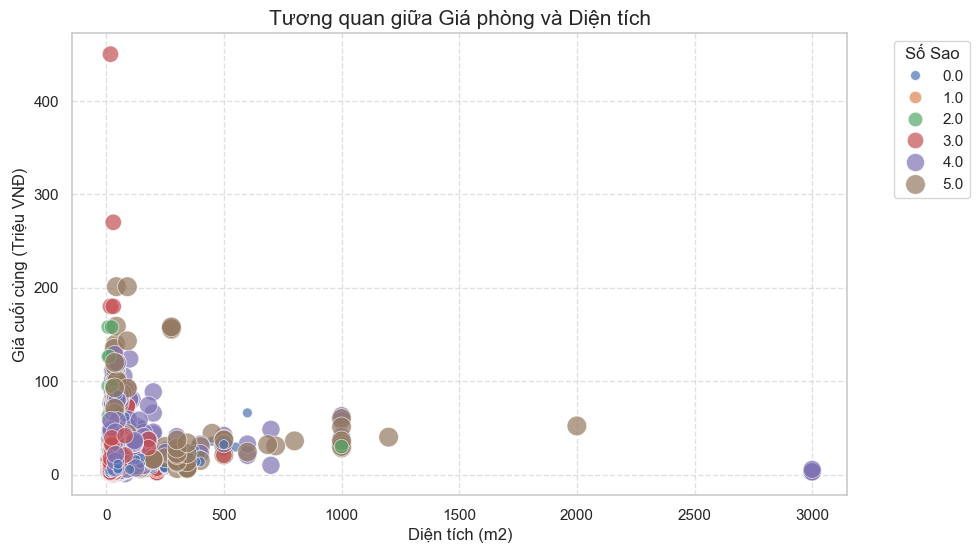

In [10]:
# --- BIỂU ĐỒ 2: TƯƠNG QUAN GIÁ VÀ DIỆN TÍCH ---
plt.figure(figsize=(10, 6))

# Lọc bỏ các giá trị thiếu ở cột diện tích để vẽ không bị lỗi
df_area = df.dropna(subset=['Area_m2_cleaned'])

sns.scatterplot(
    data=df_area,
    x='Area_m2_cleaned',
    y='Final Price (Million)',
    hue='Stars_Clean',    # Màu sắc theo số sao
    size='Stars_Clean',   # Kích thước điểm theo số sao
    sizes=(50, 200),
    palette="deep",
    alpha=0.7             # Độ trong suốt để nhìn thấy các điểm chồng nhau
)

plt.title('Tương quan giữa Giá phòng và Diện tích', fontsize=15)
plt.xlabel('Diện tích (m2)', fontsize=12)
plt.ylabel('Giá cuối cùng (Triệu VNĐ)', fontsize=12)
plt.legend(title='Số Sao', bbox_to_anchor=(1.05, 1), loc='upper left') # Đưa chú thích ra ngoài
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

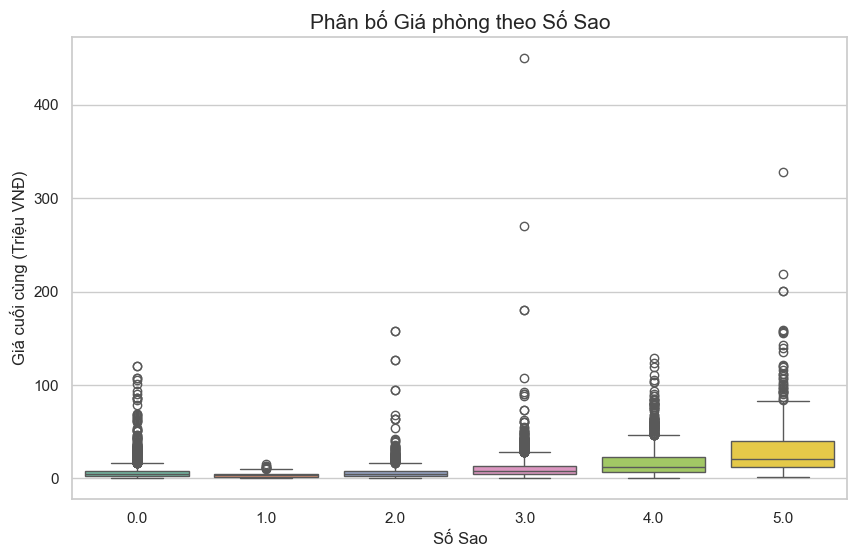

In [13]:
# --- BIỂU ĐỒ 3: PHÂN BỐ GIÁ THEO SỐ SAO ---
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df,
    x='Stars_Clean',
    y='Final Price (Million)',
    hue='Stars_Clean',
    legend=False,
    palette="Set2"
)

plt.title('Phân bố Giá phòng theo Số Sao', fontsize=15)
plt.xlabel('Số Sao', fontsize=12)
plt.ylabel('Giá cuối cùng (Triệu VNĐ)', fontsize=12)
plt.show()

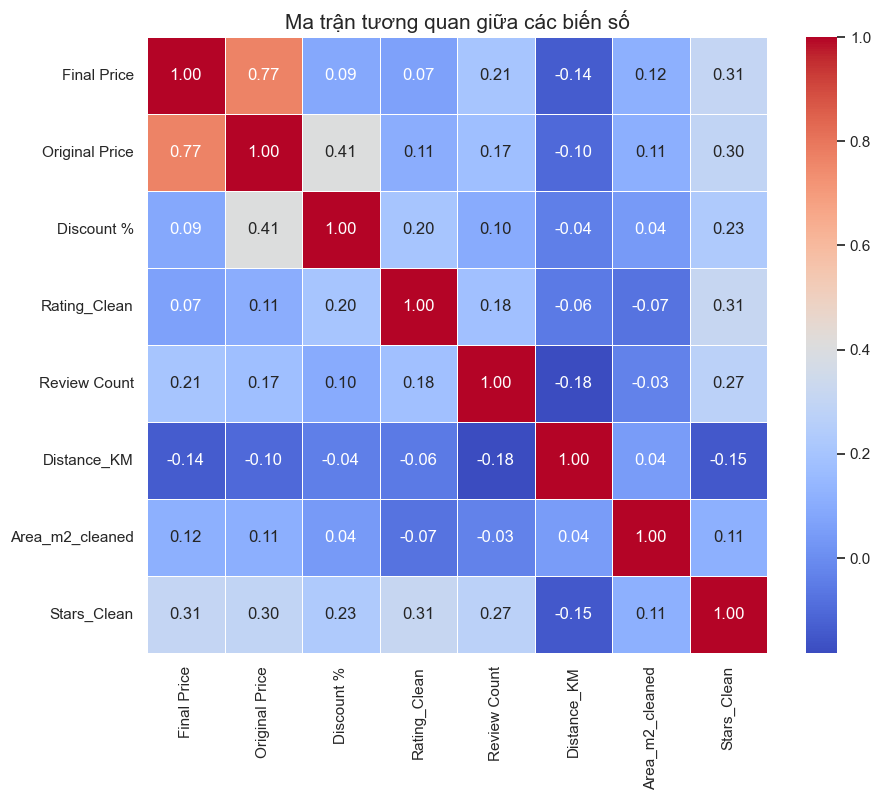

In [15]:
# --- BIỂU ĐỒ 4: MA TRẬN TƯƠNG QUAN ---
plt.figure(figsize=(10, 8))

# Chọn các cột biến số (numerical) để tính tương quan
cols_corr = ['Final Price', 'Original Price', 'Discount %', 'Rating_Clean', 
             'Review Count', 'Distance_KM', 'Area_m2_cleaned', 'Stars_Clean']

# Tính ma trận
corr_matrix = df[cols_corr].corr()

# Vẽ Heatmap
sns.heatmap(
    corr_matrix, 
    annot=True,       # Hiển thị số lên ô
    cmap='coolwarm',  # Màu nóng lạnh (Đỏ: dương, Xanh: âm)
    fmt=".2f",        # Làm tròn 2 chữ số thập phân
    linewidths=0.5
)

plt.title('Ma trận tương quan giữa các biến số', fontsize=15)
plt.show()